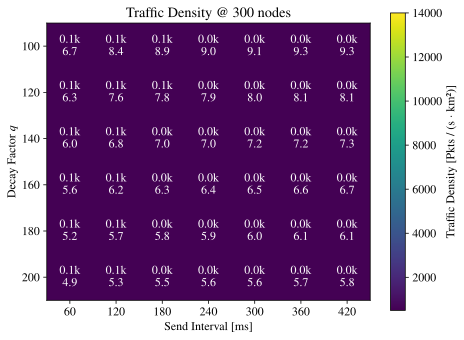

In [5]:
import numpy as np
import marshal, json
import matplotlib.pyplot as plt
import matplotlib
import json, math
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline
#set_matplotlib_formats('svg')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300
})

v = 43

def get_rdf_traffic_density(n,i,q):
    num_sent = 0
    num_fwd = 0

    num_runs = 10
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_r{r}.json', 'rb') as f:
                data = json.load(f)
                num_sent += data['num_sent']
                num_fwd += data['num_fwd']
        except:
            errors += 1

    if errors == num_runs:
        return (0,0)
    return (num_sent / (num_runs - errors), num_fwd / (num_runs- errors))
        


sim_time = 300
num_nodes = 100
q_list = [100, 120, 140, 160, 180, 200]
i_list = [60, 120, 180, 240, 300, 360, 420]
data = np.zeros((len(q_list), len(i_list)))
amplification = np.zeros((len(q_list), len(i_list)))

for x, q in enumerate(q_list):
    for y, i in enumerate(i_list):
        (num_sent, num_fwd) = get_rdf_traffic_density(num_nodes, i, q)
        data[x][y] = (num_fwd + num_sent) / (sim_time * 25)
        amplification[x][y] = (num_fwd + num_sent) / num_sent

fig, ax = plt.subplots()
fig.tight_layout()
im = ax.imshow(data, vmin= 500, vmax = 14000)
cbar = plt.colorbar(im)
cbar.set_label("Traffic Density [Pkts / (s $\cdot$  km²)]")
ax.set_yticks(np.arange(len(q_list)), labels=q_list)
ax.set_xticks(np.arange(len(i_list)), labels=i_list)
ax.set_xlabel('Send Interval [ms]')
ax.set_ylabel('Decay Factor $q$')
plt.title('Traffic Density @ 300 nodes')

for i in range(len(i_list)):
    for j in range(len(q_list)):
        text = ax.text(i, j, f'{data[j, i] / 1000:.1f}k\n{amplification[j,i]:.1f}',
                       ha="center", va="center", color="w")

plt.show()

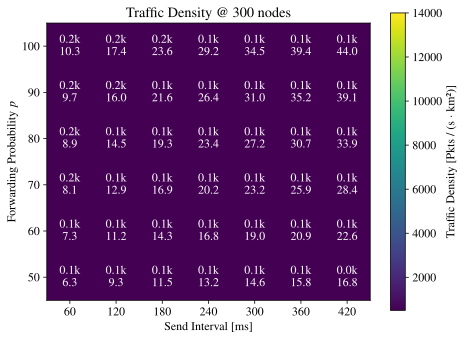

In [6]:
def get_sf_traffic_density(n,i,p):
    num_sent = 0
    num_fwd = 0

    num_runs = 10
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_sf_n{n}_i{i}_p{p}_r{r}.json', 'rb') as f:
                data = json.load(f)
                num_sent += data['num_sent']
                num_fwd += data['num_fwd']
        except:
            errors += 1

    if errors == num_runs:
        return (0,0)
    return (num_sent / (num_runs - errors), num_fwd / (num_runs- errors))
        

p_list = [100, 90, 80, 70, 60, 50]
i_list = [60, 120, 180, 240, 300, 360, 420]
data = np.zeros((len(p_list), len(i_list)))
amplification = np.zeros((len(p_list), len(i_list)))

for x, p in enumerate(p_list):
    for y, i in enumerate(i_list):
        (num_sent, num_fwd) = get_sf_traffic_density(num_nodes, i, p)
        data[x][y] = (num_fwd + num_sent) / (sim_time * 25)
        amplification[x][y] = (num_fwd + num_sent) / num_sent

fig, ax = plt.subplots()
fig.tight_layout()
im = ax.imshow(data, vmin= 500, vmax = 14000)
cbar = plt.colorbar(im)
cbar.set_label("Traffic Density [Pkts / (s $\cdot$  km²)]")
ax.set_yticks(np.arange(len(p_list)), labels=p_list)
ax.set_xticks(np.arange(len(i_list)), labels=i_list)
ax.set_xlabel('Send Interval [ms]')
ax.set_ylabel('Forwarding Probability $p$')
plt.title('Traffic Density @ 300 nodes')

for i in range(len(i_list)):
    for j in range(len(p_list)):
        text = ax.text(i, j, f'{data[j, i] / 1000:.1f}k\n{amplification[j,i]:.1f}',
                       ha="center", va="center", color="w")

plt.show()

## Traffic Density as Stacked, Grouped Bar Plot
This Plot should show how the traffic density changes between sent/forwarded traffic with number of nodes different flooding protocols

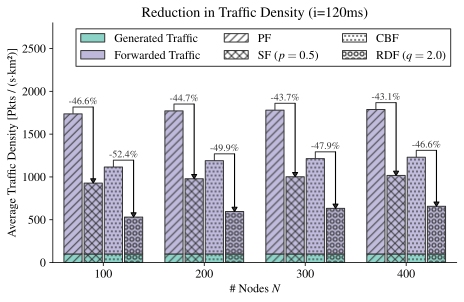

In [7]:
sf_100_sent = []
sf_100_fwd = []
sf_50_sent = []
sf_50_fwd = []

rdf_0_sent = []
rdf_0_fwd = []
rdf_200_sent = []
rdf_200_fwd = []

nn = [100, 200, 300, 400]
interval = 120

for n in nn:
    A = n/12
    T = math.sqrt(A) * 1000 / 33.3
    AT = A * T
    (data_sf_100_sent, data_sf_100_fwd) = get_sf_traffic_density(n, interval, 100)
    (data_sf_50_sent, data_sf_50_fwd) =  get_sf_traffic_density(n, interval, 50)
    (data_rdf_0_sent, data_rdf_0_fwd) =  get_rdf_traffic_density(n, interval, 0)
    (data_rdf_200_sent, data_rdf_200_fwd) =  get_rdf_traffic_density(n, interval, 200)

    sf_100_sent.append(data_sf_100_sent / AT)
    sf_100_fwd.append(data_sf_100_fwd / AT)
    sf_50_sent.append(data_sf_50_sent / AT)
    sf_50_fwd.append(data_sf_50_fwd / AT)

    rdf_0_sent.append(data_rdf_0_sent / AT)
    rdf_0_fwd.append(data_rdf_0_fwd / AT)
    rdf_200_sent.append(data_rdf_200_sent / AT)
    rdf_200_fwd.append(data_rdf_200_fwd / AT)

bar_width = 0.2
pf_color='#fd7f6f'
sf_color='#7eb0d5'
cbf_color='#b2e061'
rdf_color='#ffb55a'

pf_hatch='///'
sf_hatch='xxx'
cbf_hatch='...'
rdf_hatch='OO'

sent_color='#8bd3c7'#'#fd7f6f'
fwd_color='#beb9db'#'#7eb0d5'

fig, ax = plt.subplots(figsize=(6.4, 4))
fig.tight_layout()

sf_100_p = np.arange(len(sf_100_sent))
sf_50_p = [x + bar_width for x in sf_100_p]
rdf_0_p = [x + 2 * bar_width for x in sf_100_p]
rdf_200_p = [x + 3 * bar_width for x in sf_100_p]

ax.bar([-10],[0], label='Generated Traffic', color=sent_color, edgecolor='#333')
ax.bar([-10],[0], label='Forwarded Traffic', color=fwd_color, edgecolor='#333')
ax.bar([-10],[0], label='PF', color='#fff', edgecolor='#333', hatch=pf_hatch)
ax.bar([-10],[0], label='SF ($p=0.5$)', color='#fff', edgecolor='#333', hatch=sf_hatch)
ax.bar([-10],[0], label='CBF', color='#fff', edgecolor='#333', hatch=cbf_hatch)
ax.bar([-10],[0], label='RDF ($q=2.0$)', color='#fff', edgecolor='#333', hatch=rdf_hatch)

ax.bar(sf_100_p, sf_100_sent, width=bar_width * 0.9, edgecolor='#333', color=sent_color, hatch=pf_hatch, alpha=.99)
ax.bar(sf_100_p, sf_100_fwd, bottom=sf_100_sent, width=bar_width * 0.9, edgecolor='#333', color=fwd_color, hatch=pf_hatch, alpha=.99)
ax.bar(sf_50_p, sf_50_sent, width=bar_width * 0.9, edgecolor='#333', color=sent_color, hatch=sf_hatch, alpha=.99)
ax.bar(sf_50_p, sf_50_fwd, bottom=sf_50_sent, width=bar_width * 0.9, edgecolor='#333', color=fwd_color, hatch=sf_hatch, alpha=.99)
ax.bar(rdf_0_p, rdf_0_sent, width=bar_width * 0.9, edgecolor='#333', color=sent_color, hatch=cbf_hatch, alpha=.99)
ax.bar(rdf_0_p, rdf_0_fwd, bottom=rdf_0_sent, width=bar_width * 0.9, edgecolor='#333', color=fwd_color, hatch=cbf_hatch, alpha=.99)
ax.bar(rdf_200_p, rdf_200_sent, width=bar_width * 0.9, edgecolor='#333', color=sent_color, hatch=rdf_hatch, alpha=.99)
ax.bar(rdf_200_p, rdf_200_fwd, bottom=rdf_200_sent, width=bar_width * 0.9, edgecolor='#333', color=fwd_color, hatch=rdf_hatch, alpha=.99)


# Plot arrows

for i in range(len(nn)):
    y_offset = 80
    # SF
    path = matplotlib.path.Path([[i, sf_100_sent[i] + sf_100_fwd[i]], [i, sf_100_sent[i] + sf_100_fwd[i] + y_offset], [i+ bar_width, sf_100_sent[i] + sf_100_fwd[i] + y_offset]])
    t1 = matplotlib.patches.PathPatch(path, ec='#333', fill=None, lw=1, clip_on=False)
    plt.gca().add_patch(t1)
    arrow_dist = y_offset + sf_100_sent[i] + sf_100_fwd[i] - (sf_50_sent[i] + sf_50_fwd[i])
    plt.arrow(i+ bar_width, sf_100_sent[i] + sf_100_fwd[i] + y_offset, 0, -arrow_dist, length_includes_head=True, head_width=0.05, head_length=50, fc='#333')

    reduction = (sf_100_sent[i] + sf_100_fwd[i] - (sf_50_sent[i] + sf_50_fwd[i])) / (sf_100_sent[i] + sf_100_fwd[i]) * 100
    ax.text(i + bar_width / 2, sf_100_sent[i] + sf_100_fwd[i] + y_offset * 1.1, f'-{reduction:.1f}\%', ha="center", va="bottom", color="#333", fontsize=10)
    
    # RDF
    path = matplotlib.path.Path([[i+2 * bar_width, rdf_0_sent[i] + rdf_0_fwd[i]], [i+2 * bar_width, rdf_0_sent[i] + rdf_0_fwd[i] + y_offset], [i+3 * bar_width, rdf_0_sent[i] + rdf_0_fwd[i] + y_offset]])
    t1 = matplotlib.patches.PathPatch(path, ec='#333', fill=None, lw=1, clip_on=False)
    plt.gca().add_patch(t1)
    arrow_dist = y_offset + rdf_0_sent[i] + rdf_0_fwd[i] - (rdf_200_sent[i] + rdf_200_fwd[i])
    plt.arrow(i + 3 * bar_width, rdf_0_sent[i] + rdf_0_fwd[i] + y_offset, 0, -arrow_dist, length_includes_head=True, head_width=0.05, head_length=50, fc='#333')

    reduction = (rdf_0_sent[i] + rdf_0_fwd[i] - (rdf_200_sent[i] + rdf_200_fwd[i])) / (rdf_0_sent[i] + rdf_0_fwd[i]) * 100
    ax.text(i + 2.5 * bar_width, rdf_0_sent[i] + rdf_0_fwd[i] + y_offset * 1.1, f'-{reduction:.1f}\%', ha="center", va="bottom", color="#333", fontsize=10)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xlabel('\# Nodes $N$')
plt.ylabel('Average Traffic Density [Pkts / (s$\cdot$km²)]')
plt.xticks(sf_100_p + 1.5 * bar_width, nn)
plt.axis([-bar_width, 3 + 4* bar_width, 0, 2800])
plt.title(f'Reduction in Traffic Density (i={interval}ms)')
leg = plt.legend(fancybox=False, framealpha=1.0, ncol=3)
leg.get_frame().set_edgecolor('#333')

fig.savefig(f"../figures/traffic_density_bars_i{interval}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/traffic_density_bars_i{interval}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)
plt.show()